In [60]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [61]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('data/creditcard_sampledata.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   Time        8000 non-null   int64  
 2   V1          8000 non-null   float64
 3   V2          8000 non-null   float64
 4   V3          8000 non-null   float64
 5   V4          8000 non-null   float64
 6   V5          8000 non-null   float64
 7   V6          8000 non-null   float64
 8   V7          8000 non-null   float64
 9   V8          8000 non-null   float64
 10  V9          8000 non-null   float64
 11  V10         8000 non-null   float64
 12  V11         8000 non-null   float64
 13  V12         8000 non-null   float64
 14  V13         8000 non-null   float64
 15  V14         8000 non-null   float64
 16  V15         8000 non-null   float64
 17  V16         8000 non-null   float64
 18  V17         8000 non-null   float64
 19  V18         8000 non-null  

In [64]:
df.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [65]:
occ = df['Class'].value_counts()

In [66]:
ratio_cases = occ/len(df.index)

In [67]:
ratio_cases

0    0.997875
1    0.002125
Name: Class, dtype: float64

In [68]:
len(df)

8000

In [69]:
import numpy as np

def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [70]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.25)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [71]:
X, y = prep_data(df)

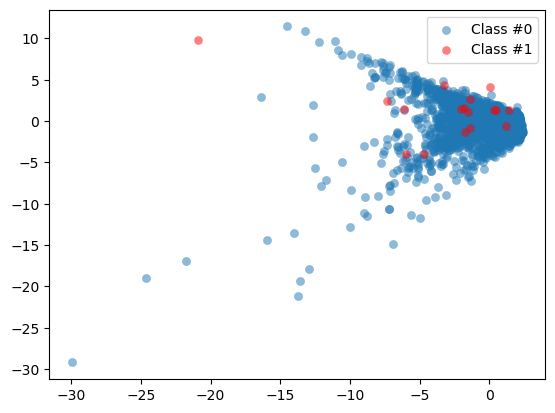

In [72]:
plot_data(X, y)

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
method = SMOTE()

In [75]:
X_resampled, y_resampled = method.fit_resample(X, y)

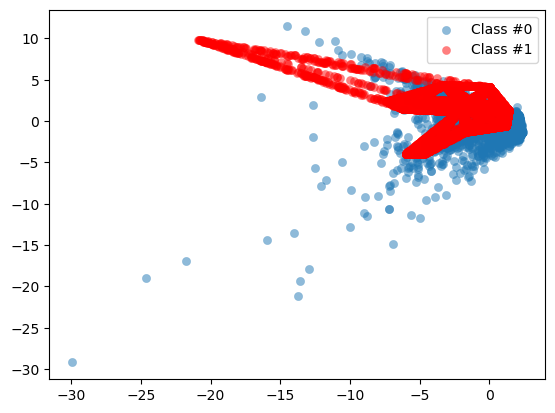

In [76]:
plot_data(X_resampled, y_resampled)

In [77]:
pd.value_counts(pd.Series(y))

0    7983
1      17
dtype: int64

In [78]:
pd.value_counts(pd.Series(y_resampled))

0    7983
1    7983
dtype: int64

In [79]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

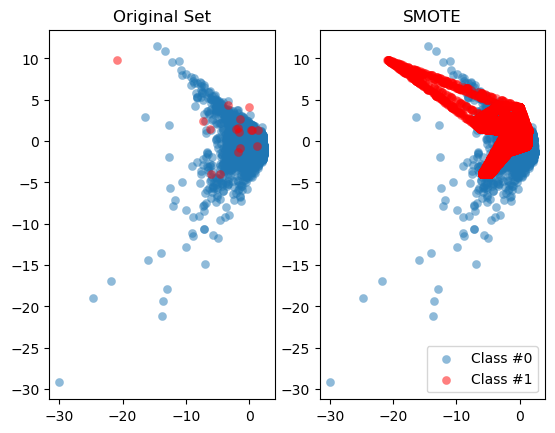

In [80]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

In [95]:
# Step 1: split the features and labels into train and test data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
# Step 2: Define which model to use
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [97]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [100]:
# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)

0.292021958613059

In [101]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [102]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95383.605161,0.023553,-0.008543,-0.002408,-0.034757,-0.020108,0.003264,0.023668,-0.004720,-0.010660,...,-0.00692,-0.004279,0.027999,0.006689,-0.000550,-0.000616,0.000659,-0.006740,0.005625,89.721167
1,83000.176471,-3.235382,1.317054,-3.762234,2.801140,-0.941354,-1.184692,-3.527826,-0.108892,-1.546536,...,-0.29245,0.361582,0.159210,-0.119366,-0.144082,0.155552,0.038765,0.265996,0.131853,65.287647


In [103]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

In [104]:
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,7949,34
1,13,4


In [105]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [109]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [110]:
# Obtain model predictions
predicted = model.predict(X_test)

In [113]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2390
           1       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


In [114]:
# Define which resampling method and which ML model to use in the pipeline
# resampling = SMOTE(kind='borderline2')  # has been changed to BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

In [116]:
from imblearn.pipeline import Pipeline 

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [117]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [118]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

In [119]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2390
           1       0.35      0.60      0.44        10

    accuracy                           0.99      2400
   macro avg       0.68      0.80      0.72      2400
weighted avg       1.00      0.99      0.99      2400

Confusion matrix:
 [[2379   11]
 [   4    6]]
